# Goal: Understand the Data
Understanding the features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
dataset = pd.read_csv('Cleaned-Bank.csv')

In [3]:
dataset

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,Unemployed,Married,Primary,No,1787,No,No,Cellular,19,Oct,79,1,-1,0,Unknown,No
1,33,Services,Married,Secondary,No,4789,Yes,Yes,Cellular,11,May,220,1,339,4,Failure,No
2,35,Management,Single,Tertiary,No,1350,Yes,No,Cellular,16,Apr,185,1,330,1,Failure,No
3,30,Management,Married,Tertiary,No,1476,Yes,Yes,Unknown,3,Jun,199,4,-1,0,Unknown,No
4,59,Blue-collar,Married,Secondary,No,0,Yes,No,Unknown,5,May,226,1,-1,0,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,Services,Married,Secondary,No,-333,Yes,No,Cellular,30,Jul,329,5,-1,0,Unknown,No
4517,57,Self-employed,Married,Tertiary,Yes,-3313,Yes,Yes,Unknown,9,May,153,1,-1,0,Unknown,No
4518,57,Technician,Married,Secondary,No,295,No,No,Cellular,19,Aug,151,11,-1,0,Unknown,No
4519,28,Blue-collar,Married,Secondary,No,1137,No,No,Cellular,6,Feb,129,4,211,3,Other,No


# Numerical Features

## Data Distribution

In [4]:
dataset.describe()

,Age,Balance,Day,Duration,Campaign,Pdays,Previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


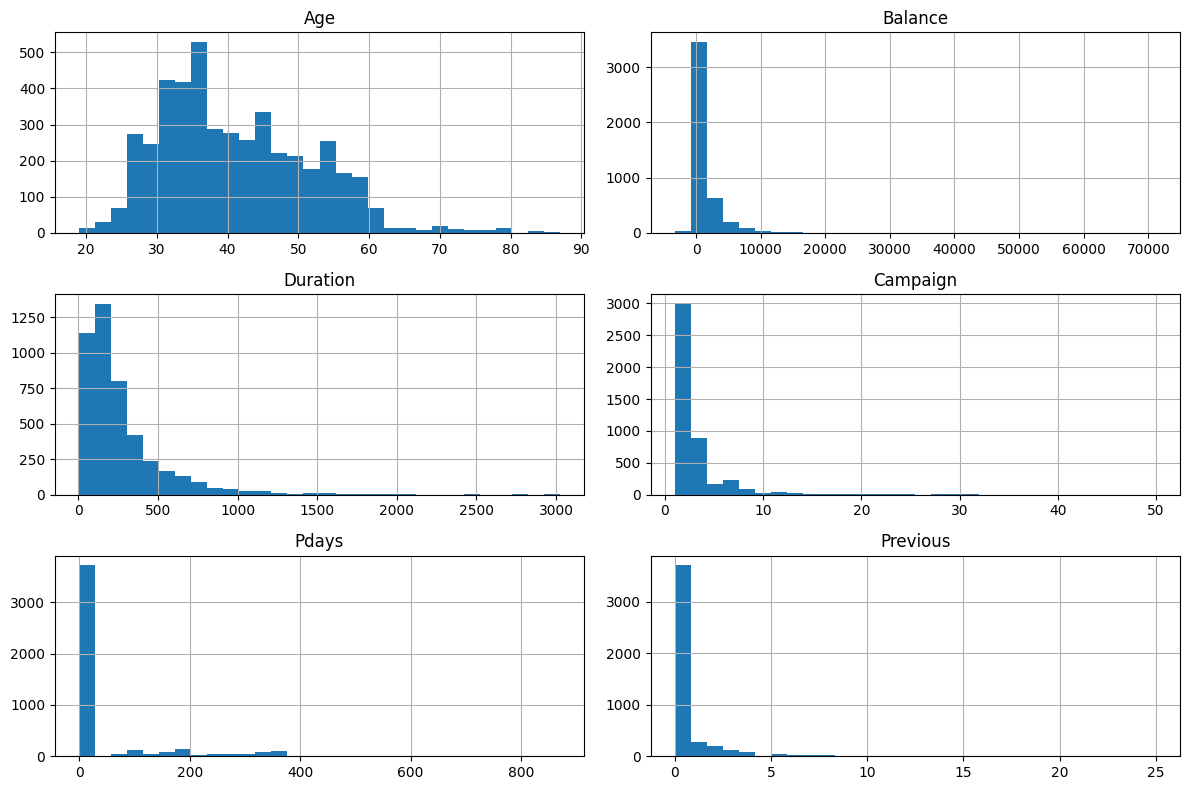

In [5]:
# Histograms for numerical features

dataset[['Age', 'Balance', 'Duration', 'Campaign', 'Pdays', 'Previous']].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [6]:
numerical_features = dataset.select_dtypes(include=['int64', 'float64'])
numerical_features

,Age,Balance,Day,Duration,Campaign,Pdays,Previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [7]:
# Shapiro-Wilk Test
# A p-value less than 0.05 (significance level) means the feature is not normally distributed (i.e., skewed).

from scipy.stats import shapiro

for column in numerical_features.columns:
    stat, p = shapiro(numerical_features[column])
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p-value={p}')

    if p > 0.05:
        print(f'{column} looks normally distributed (fail to reject H0)')
    else:
        print(f'{column} is not normally distributed (reject H0)')

Shapiro-Wilk Test for Age: Statistics=0.9595145277540517, p-value=9.427573604574863e-34
Age is not normally distributed (reject H0)
Shapiro-Wilk Test for Balance: Statistics=0.5015103047083118, p-value=1.124061228956797e-77
Balance is not normally distributed (reject H0)
Shapiro-Wilk Test for Day: Statistics=0.9607232557488918, p-value=2.4594380158458035e-33
Day is not normally distributed (reject H0)
Shapiro-Wilk Test for Duration: Statistics=0.7475350676955939, p-value=6.241177661046538e-64
Duration is not normally distributed (reject H0)
Shapiro-Wilk Test for Campaign: Statistics=0.5608200081619175, p-value=5.174549847035951e-75
Campaign is not normally distributed (reject H0)
Shapiro-Wilk Test for Pdays: Statistics=0.47041455561121426, p-value=5.779153971271034e-79
Pdays is not normally distributed (reject H0)
Shapiro-Wilk Test for Previous: Statistics=0.35998073307229395, p-value=4.543066320673803e-83
Previous is not normally distributed (reject H0)


In [8]:
# kolmogorov-Smirnov-Test
# a p-value less than 0.05 means the feature is not normally distributed.

from scipy.stats import kstest

for column in numerical_features.columns:
    # We compare against a normal distribution with the mean and std of the column
    stat, p = kstest(numerical_features[column], 'norm', args=(numerical_features[column].mean(), numerical_features[column].std()))
    print(f'K-S Test for {column}: Statistics={stat}, p-value={p}')

    if p > 0.05:
        print(f'{column} looks normally distributed (fail to reject H0)')
    else:
        print(f'{column} is not normally distributed (reject H0)')


K-S Test for Age: Statistics=0.09591775288698301, p-value=1.1816659626633139e-36
Age is not normally distributed (reject H0)
K-S Test for Balance: Statistics=0.2509016072974472, p-value=2.85582388779668e-251
Balance is not normally distributed (reject H0)
K-S Test for Day: Statistics=0.08356227180244274, p-value=6.536011883792079e-28
Day is not normally distributed (reject H0)
K-S Test for Duration: Statistics=0.17206488671849418, p-value=1.65394666895399e-117
Duration is not normally distributed (reject H0)
K-S Test for Campaign: Statistics=0.2820488810788749, p-value=1.18124e-318
Campaign is not normally distributed (reject H0)
K-S Test for Pdays: Statistics=0.4775685880536784, p-value=0.0
Pdays is not normally distributed (reject H0)
K-S Test for Previous: Statistics=0.4451678243115157, p-value=0.0
Previous is not normally distributed (reject H0)


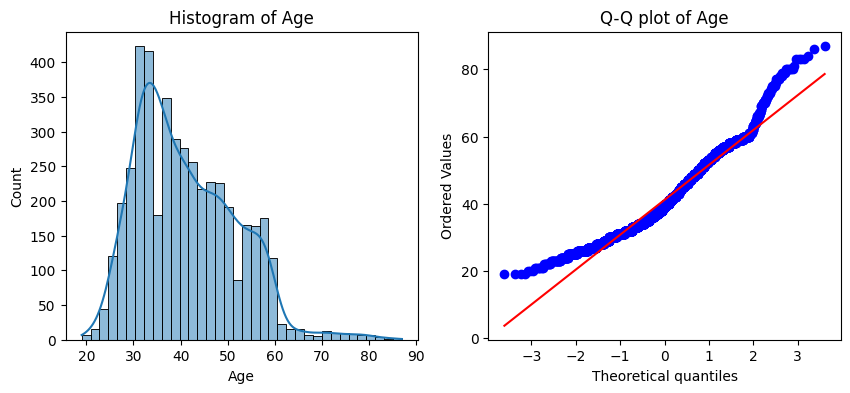

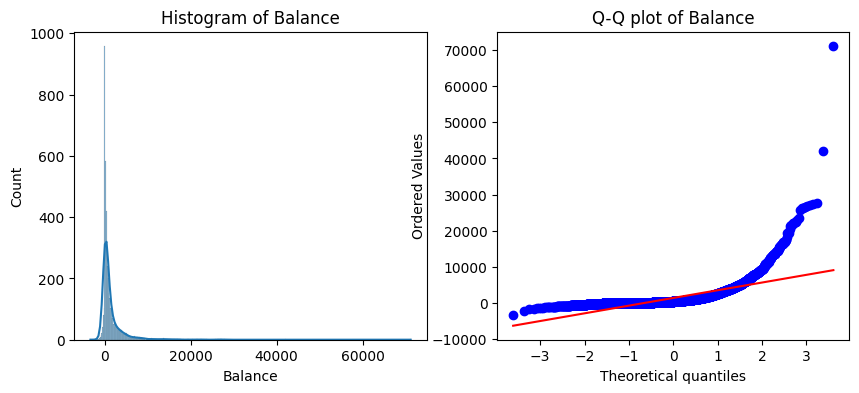

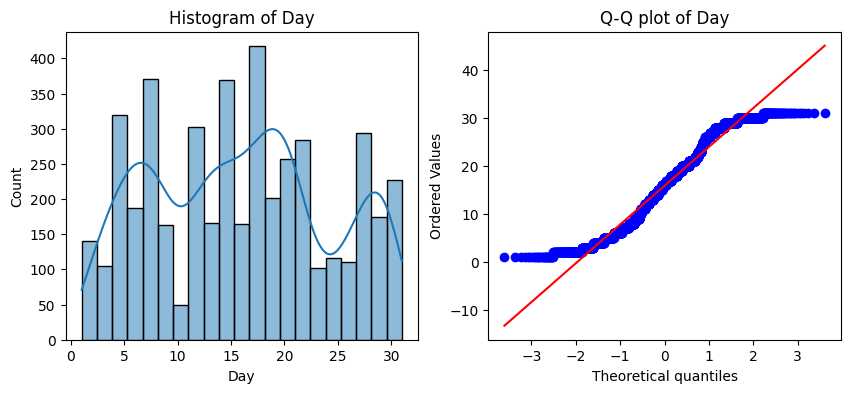

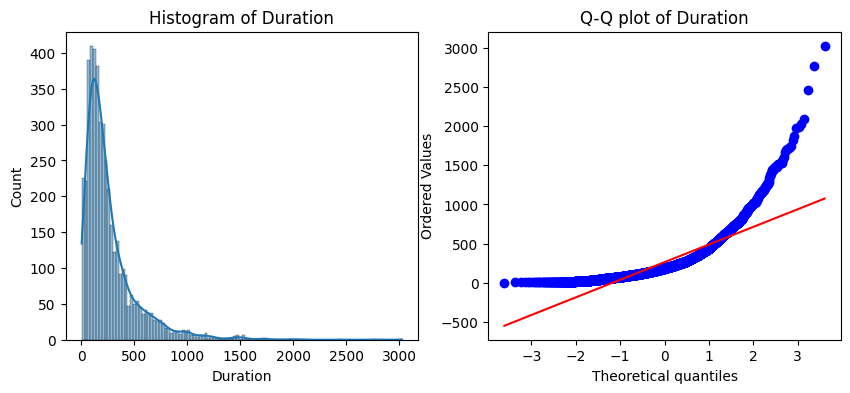

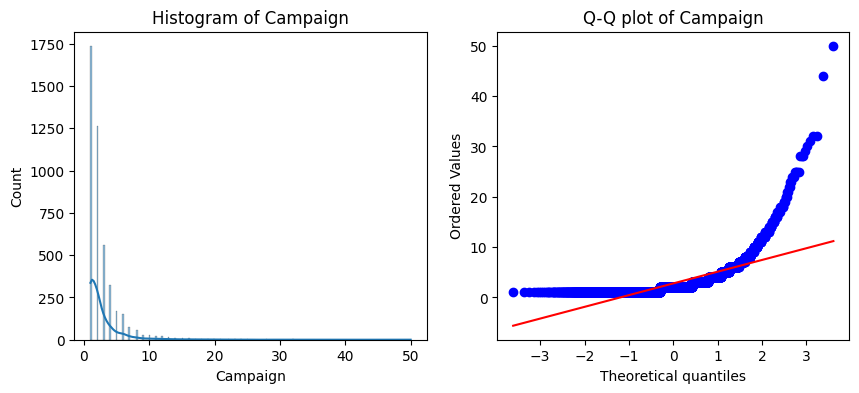

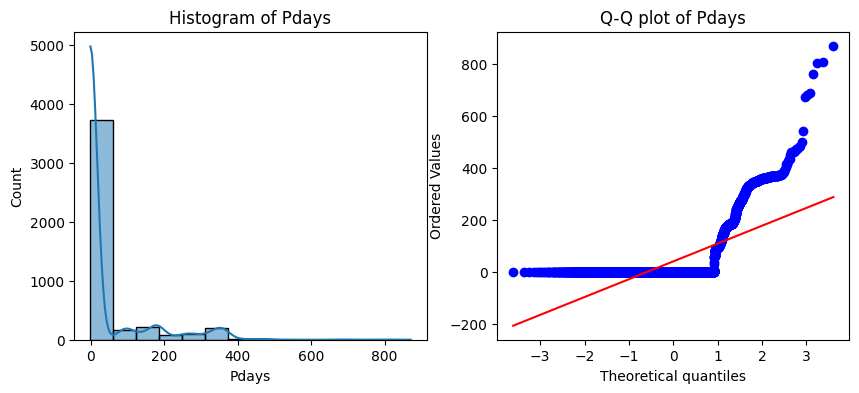

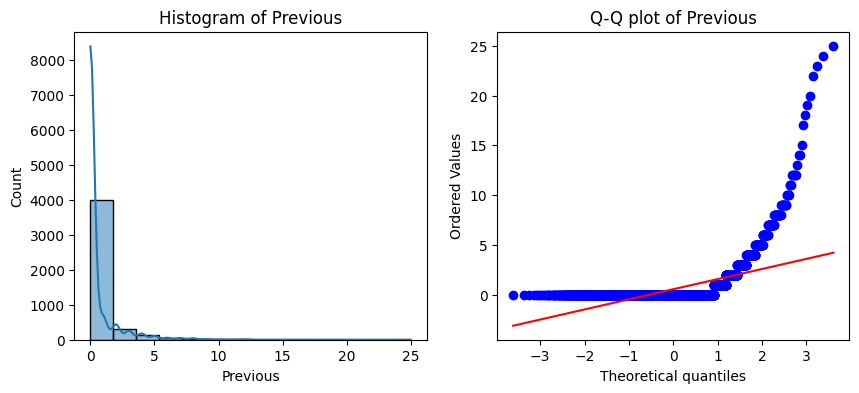

In [9]:
import scipy.stats as stats

for column in numerical_features.columns:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numerical_features[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(numerical_features[column], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {column}')

    plt.show()


## Feature-Target Relationship

### Visual Checks

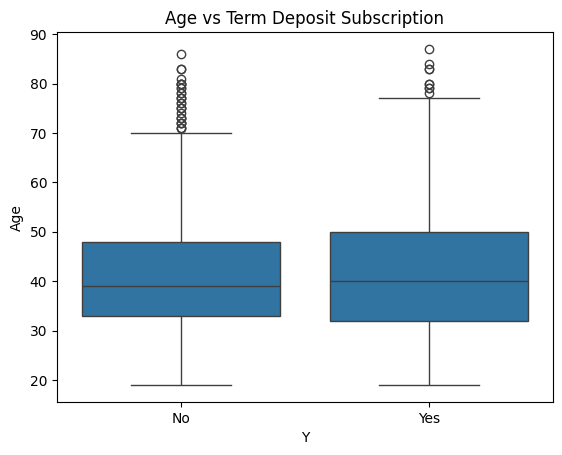

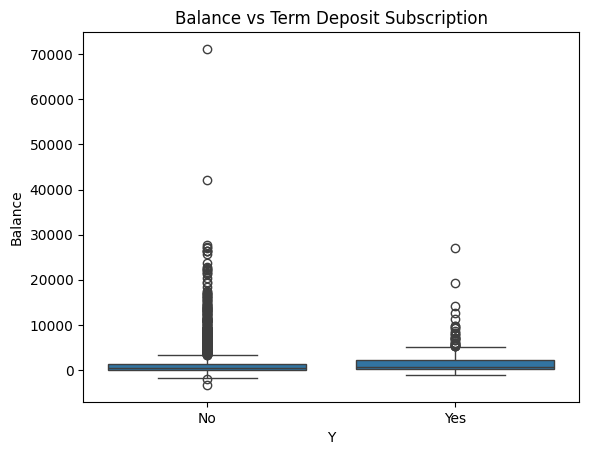

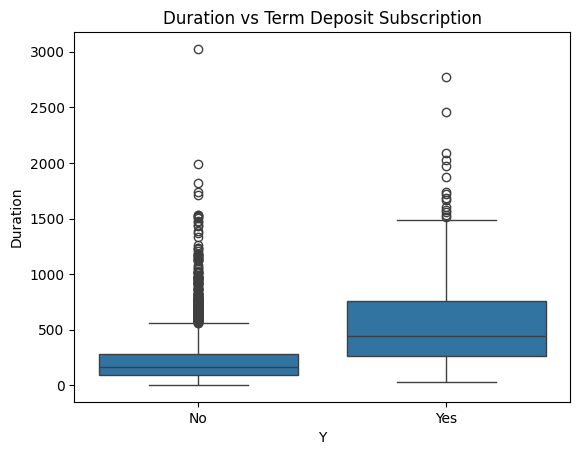

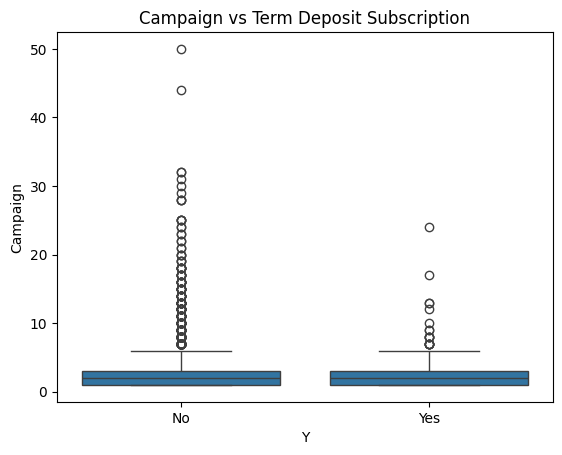

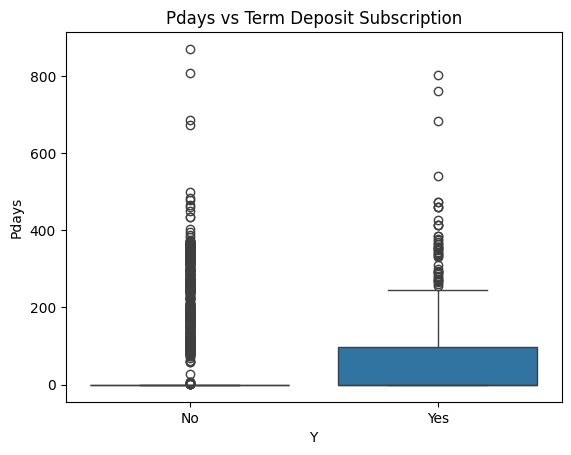

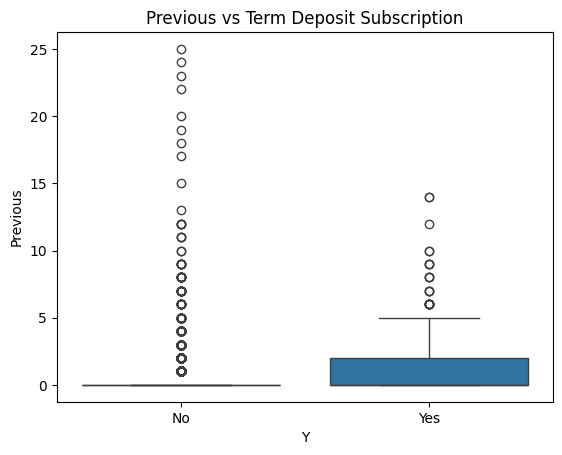

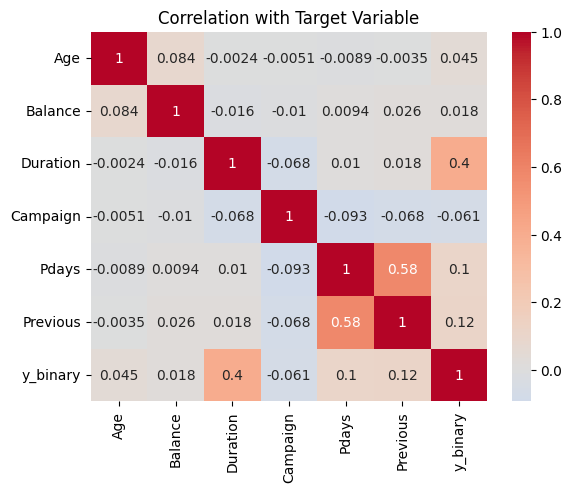

In [10]:
for feature in ['Age', 'Balance', 'Duration', 'Campaign', 'Pdays', 'Previous']:
    sns.boxplot(x='Y', y=feature, data=dataset)
    plt.title(f'{feature} vs Term Deposit Subscription')
    plt.show()

# Correlation matrix (target needs to be encoded into binary format)
dataset['y_binary'] = dataset['Y'].map({'Yes': 1, 'No': 0})  # Convert target to binary
corr = dataset[['Age', 'Balance', 'Duration', 'Campaign', 'Pdays', 'Previous', 'y_binary']].corr()

# Heatmap for correlations
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation with Target Variable')
plt.show()

### Statistical tests

In [11]:
from scipy.stats import mannwhitneyu

target = dataset['y_binary']  # Adjust this to your actual target variable name

# Separate the two groups based on the target values
group_0 = numerical_features[target == 0]
group_1 = numerical_features[target == 1]

# Initialize an empty dictionary to store p-values for Mann-Whitney U Test
p_values_mannwhitney = {}

# Perform Mann-Whitney U Test for each numerical feature
for col in numerical_features.columns:
    u_stat, u_p_value = mannwhitneyu(group_0[col], group_1[col], alternative='two-sided')
    p_values_mannwhitney[col] = u_p_value

# Convert results to DataFrame for better readability
p_values_mannwhitney_df = pd.DataFrame.from_dict(p_values_mannwhitney, orient='index', columns=['Mann-Whitney p-value'])

# Display the p-values for each feature
p_values_mannwhitney_df

,Mann-Whitney p-value
Age,2.740020e-01
Balance,1.096141e-07
Day,4.271707e-01
Duration,2.329297e-121
Campaign,1.399791e-05
Pdays,5.717436e-24
Previous,1.055240e-28


### Non-linear check

In [12]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information between each feature and the target
mi_scores = mutual_info_classif(numerical_features, dataset['Y'], random_state=0)

# Display the scores
mi_scores_series = pd.Series(mi_scores, index=numerical_features.columns).sort_values(ascending=False)
print(mi_scores_series)

Duration    0.070678
Pdays       0.031831
Previous    0.016641
Balance     0.009563
Age         0.007117
Day         0.006470
Campaign    0.002028
dtype: float64


### Model based Analysis

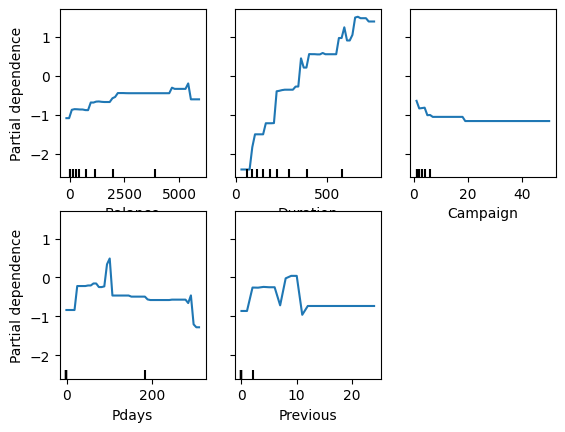

In [13]:
# pdp

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

# Define X and y
X = numerical_features  # Your numerical features dataframe
y = dataset['y_binary']   # Your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Gradient Boosting Classifier (as it's flexible and good for PDPs)
model = GradientBoostingClassifier().fit(X_train, y_train)

# Plot PDPs for selected features
PartialDependenceDisplay.from_estimator(model, X_train, features=['Balance', 'Duration', 'Campaign', 'Pdays', 'Previous'], grid_resolution=50)
#plot_partial_dependence(model, X_train, )


Accuracy of the Decision Tree: 0.85
    Feature  Importance
3  Duration    0.332281
1   Balance    0.171160
0       Age    0.162521
2       Day    0.137158
5     Pdays    0.123880
4  Campaign    0.047723
6  Previous    0.025277


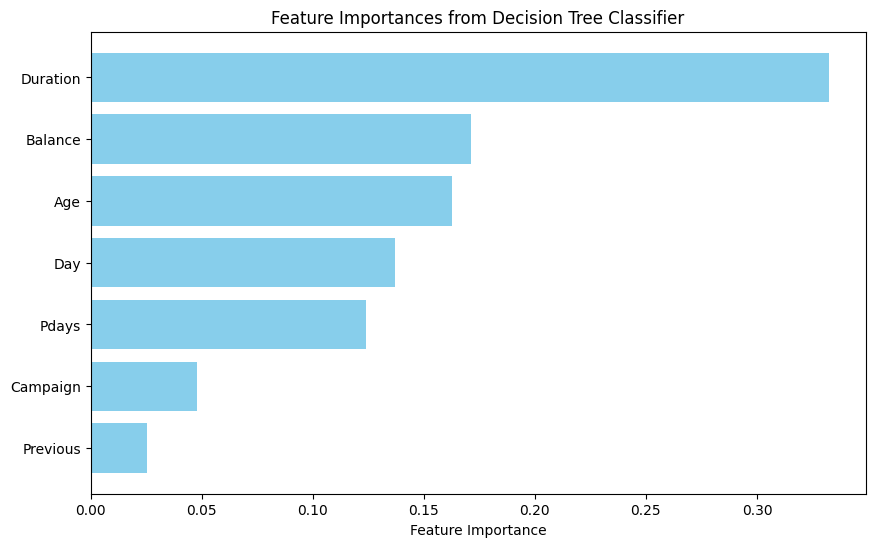

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Define X and y
X = numerical_features  # Your numerical features dataframe
y = dataset['y_binary']   # Your binary target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree: {accuracy:.2f}')

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame for better readability
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Decision Tree Classifier')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

In [15]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Assuming you already have the numerical features and the target separated
# X -> numerical features (without target)
# y -> target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, y_pred))

# Show the coefficients of the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Coefficient': log_reg.coef_[0]  # Coefficients from the model
})

print(coefficients)


Accuracy of Logistic Regression: 0.89
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.53      0.20      0.29       152

    accuracy                           0.89      1357
   macro avg       0.72      0.59      0.61      1357
weighted avg       0.86      0.89      0.87      1357

    Feature  Coefficient
0       Age     0.016964
1   Balance     0.000015
2       Day     0.009322
3  Duration     0.003892
4  Campaign    -0.097065
5     Pdays     0.001888
6  Previous     0.097365


# Categorical Features

In [29]:
# Separate features (first 16 columns) from the target variable (last column)
features = dataset.iloc[:, :-2]
# Using select_dtypes to identify categorical columns based on data type (e.g., 'object' or 'category')
categorical_columns = features.select_dtypes(include=['object', 'category']).columns

# Extract both the column names and the values for categorical features
categorical_features = features[categorical_columns]

In [21]:
categorical_features

,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Poutcome
0,Unemployed,Married,Primary,No,No,No,Cellular,Oct,Unknown
1,Services,Married,Secondary,No,Yes,Yes,Cellular,May,Failure
2,Management,Single,Tertiary,No,Yes,No,Cellular,Apr,Failure
3,Management,Married,Tertiary,No,Yes,Yes,Unknown,Jun,Unknown
4,Blue-collar,Married,Secondary,No,Yes,No,Unknown,May,Unknown
...,...,...,...,...,...,...,...,...,...
4516,Services,Married,Secondary,No,Yes,No,Cellular,Jul,Unknown
4517,Self-employed,Married,Tertiary,Yes,Yes,Yes,Unknown,May,Unknown
4518,Technician,Married,Secondary,No,No,No,Cellular,Aug,Unknown
4519,Blue-collar,Married,Secondary,No,No,No,Cellular,Feb,Other


## Data Distribution

In [32]:
# frequency distribution


for column in categorical_columns:
    print(f"Column: {column}")
    value_counts = dataset[column].value_counts()
    percentages = dataset[column].value_counts(normalize=True) * 100

    frequency_table = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages
    })

    print(frequency_table)
    print("\n")



Column: Job
               Count  Percentage
Job                             
Management       969   21.433311
Blue-collar      946   20.924574
Technician       768   16.987392
Admin.           478   10.572882
Services         417    9.223623
Retired          230    5.087370
Self-employed    183    4.047777
Entrepreneur     168    3.715992
Unemployed       128    2.831232
Housemaid        112    2.477328
Student           84    1.857996
Unknown           38    0.840522


Column: Marital
          Count  Percentage
Marital                    
Married    2797   61.866844
Single     1196   26.454324
Divorced    528   11.678832


Column: Education
           Count  Percentage
Education                   
Secondary   2306   51.006415
Tertiary    1350   29.860650
Primary      678   14.996682
Unknown      187    4.136253


Column: Default
         Count  Percentage
Default                   
No        4445   98.318956
Yes         76    1.681044


Column: Housing
         Count  Percentage
Hou

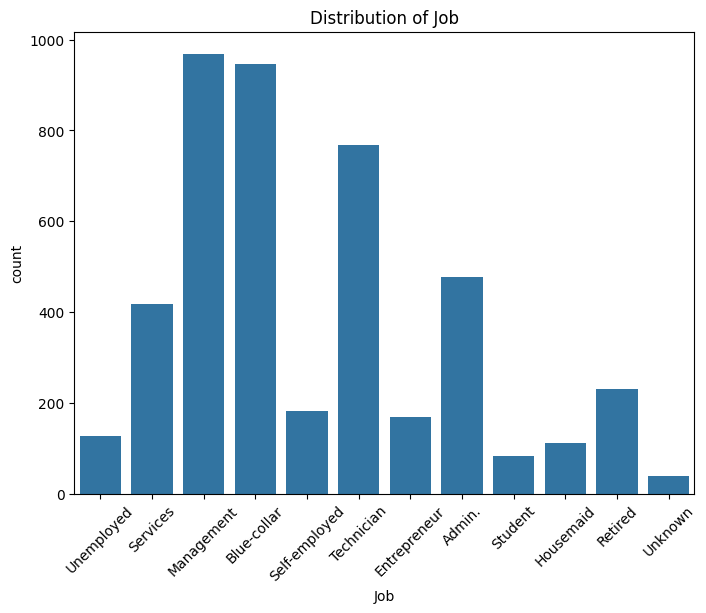

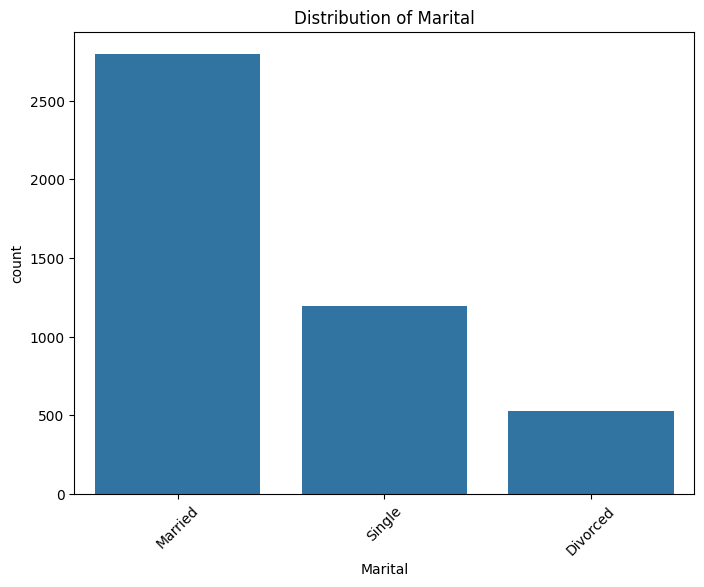

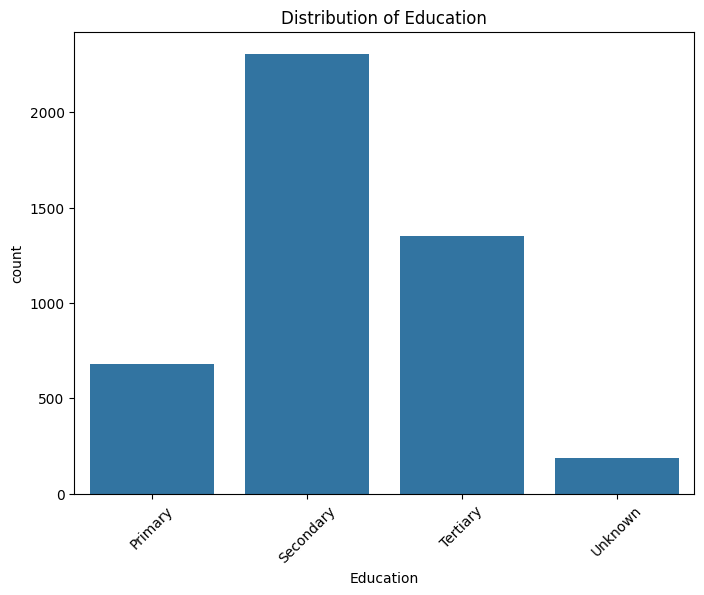

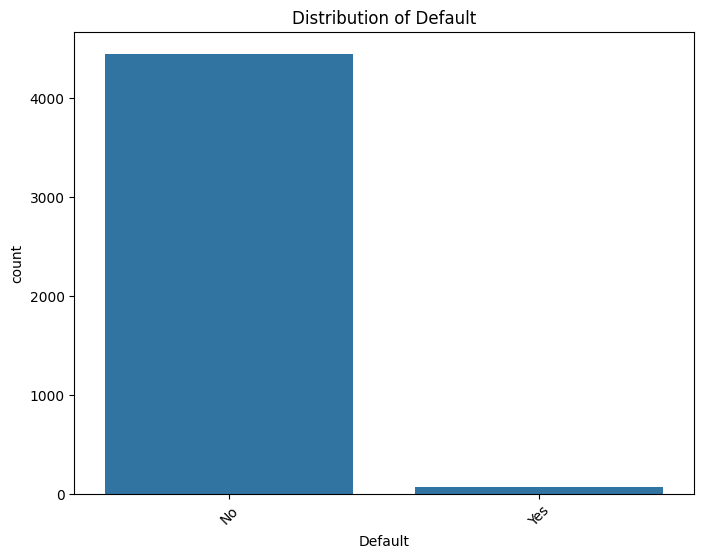

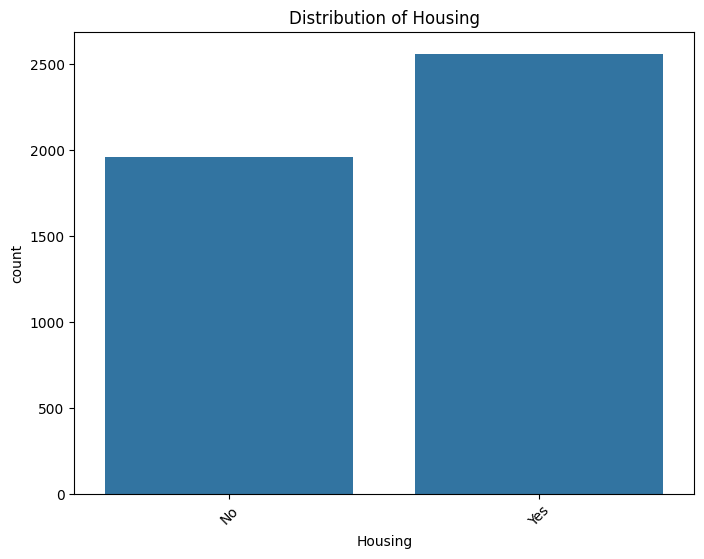

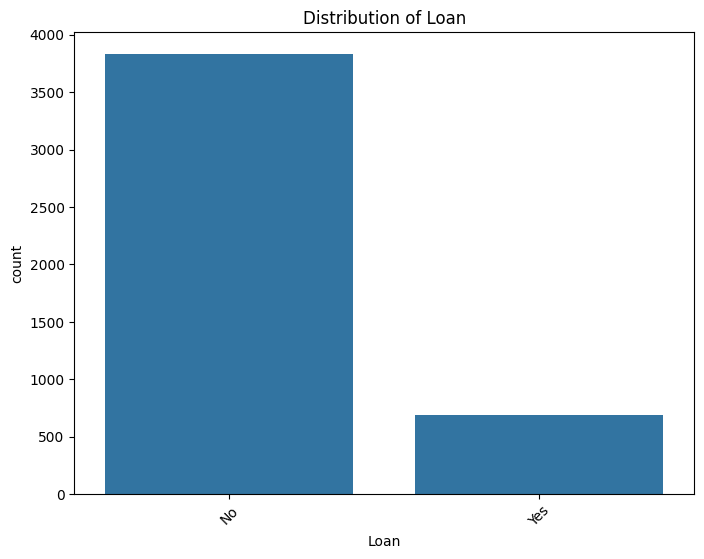

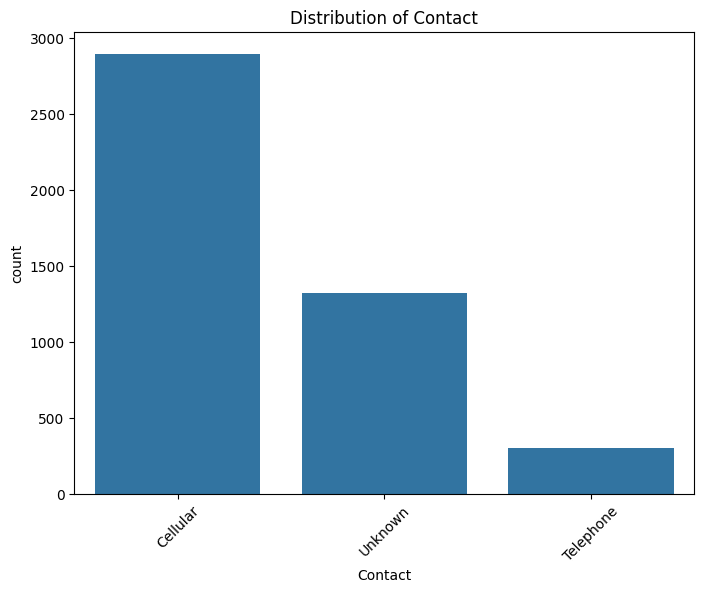

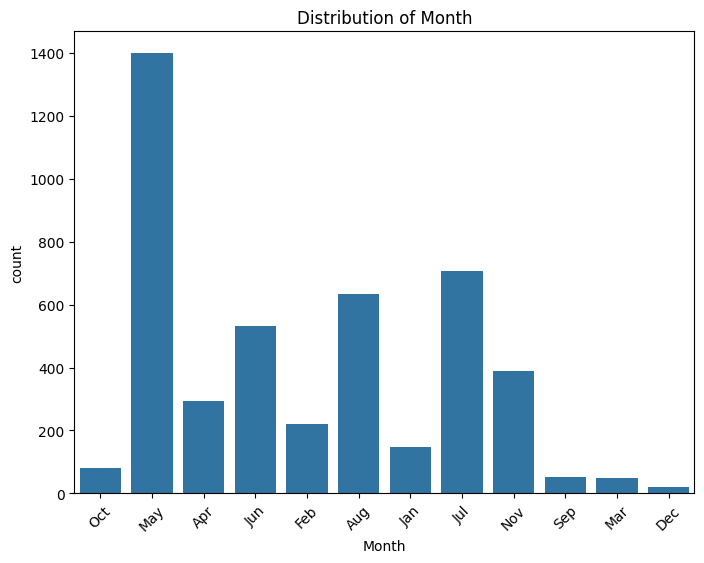

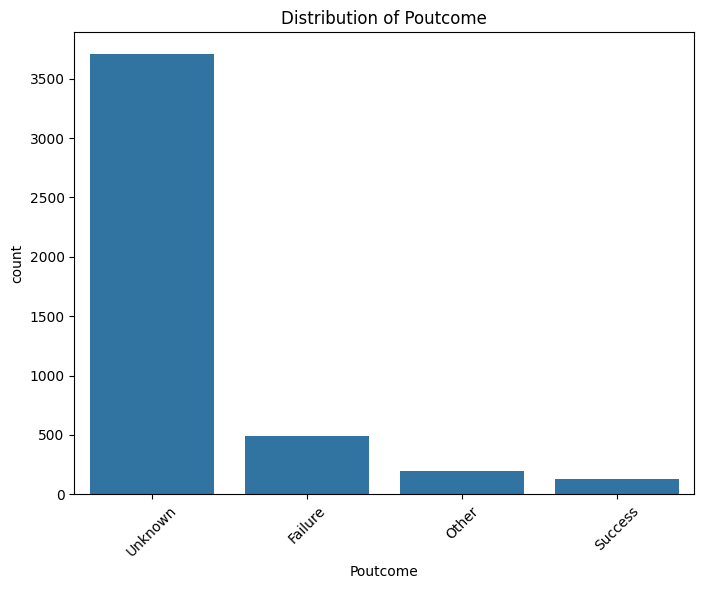

In [25]:
# Bar plot

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=dataset)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)  # Rotate the x labels if needed
    plt.show()


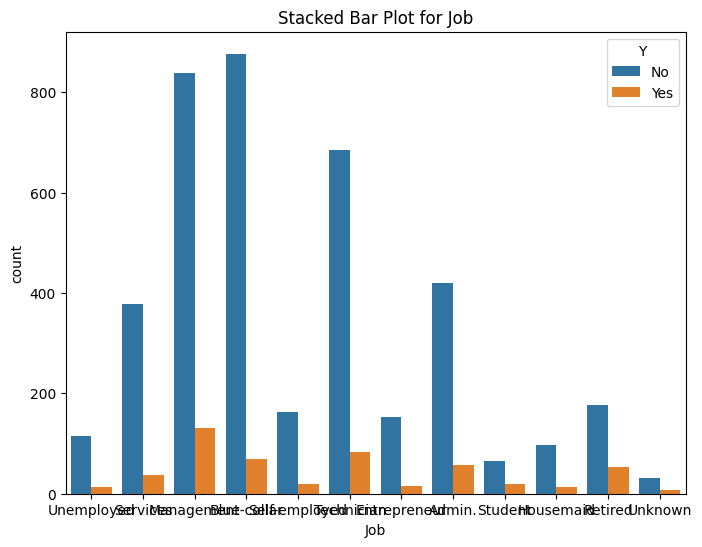

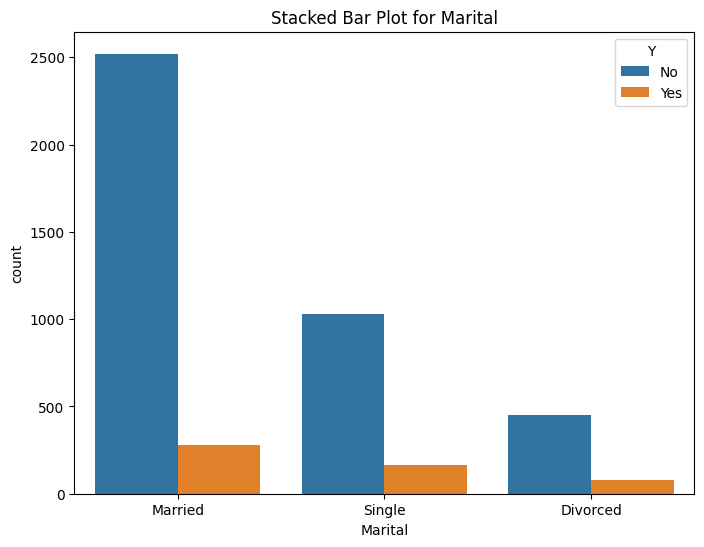

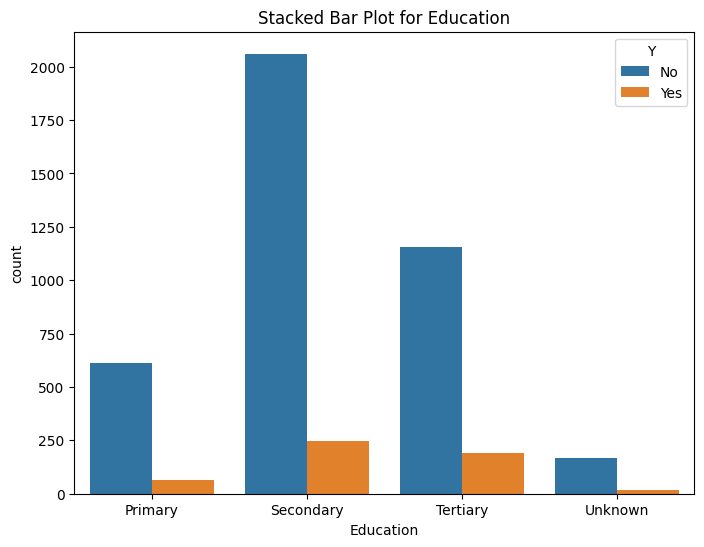

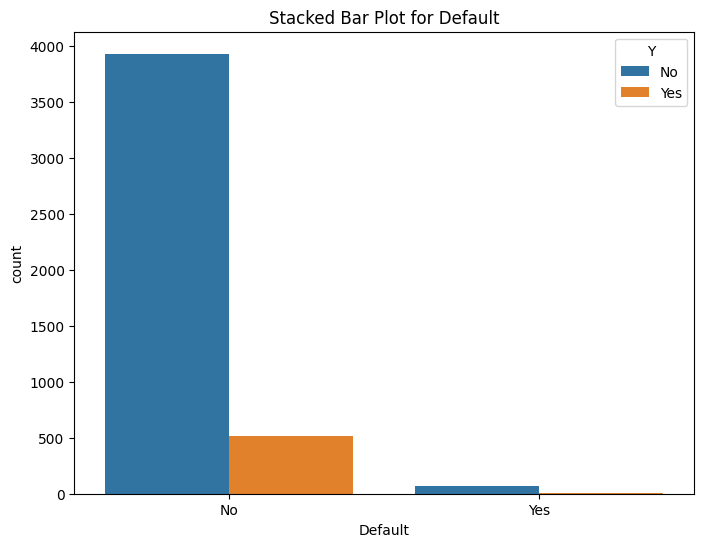

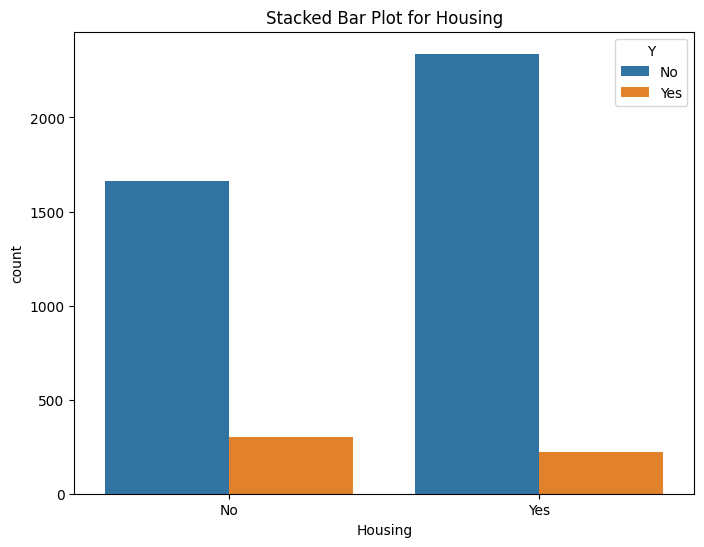

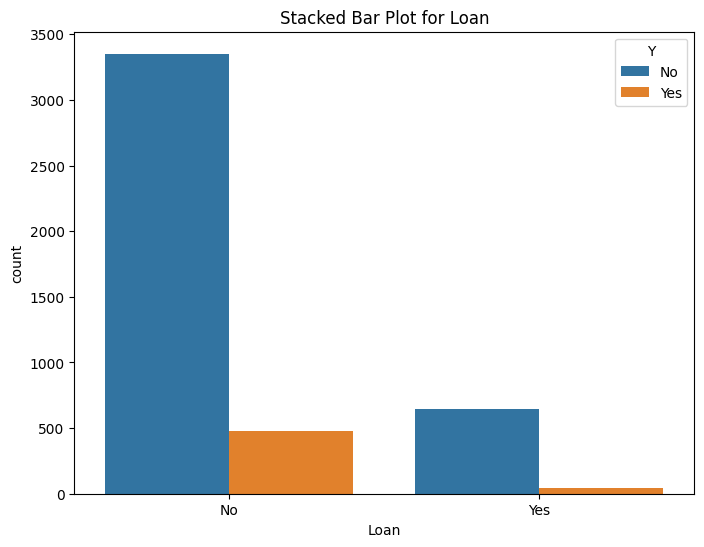

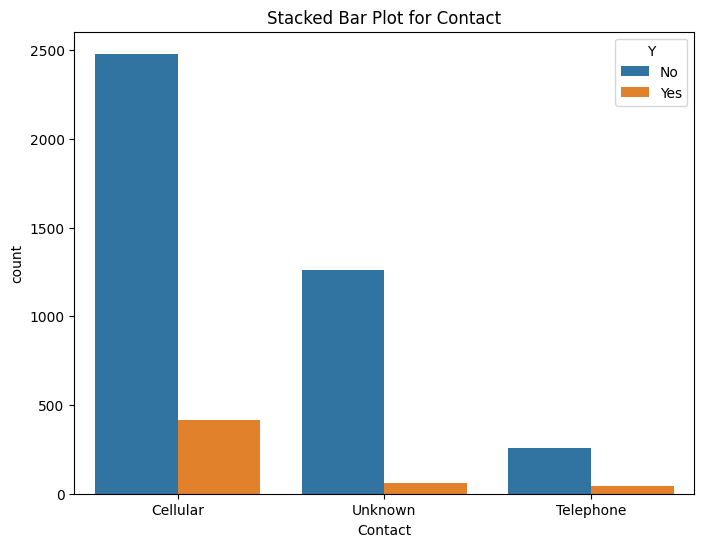

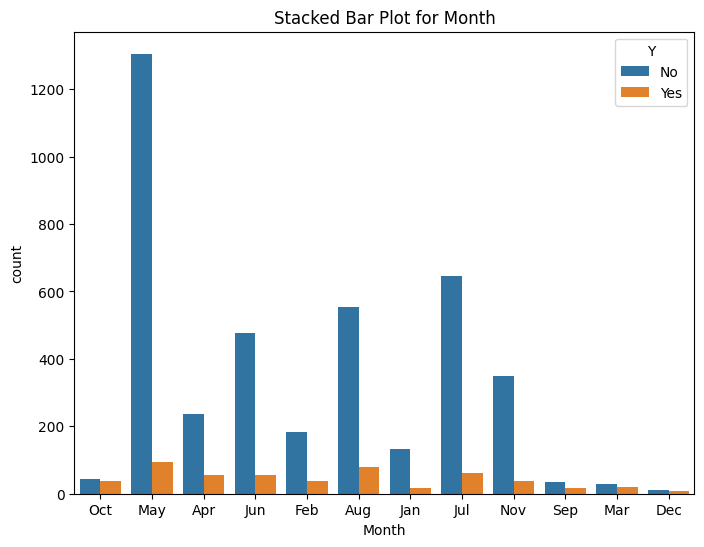

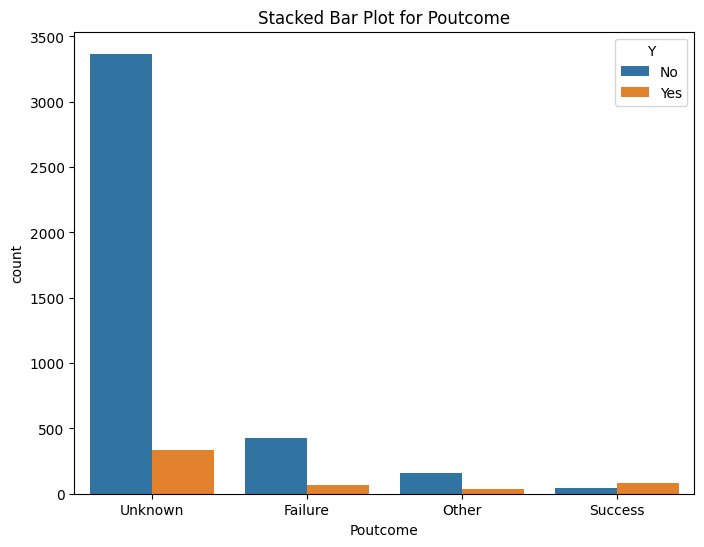

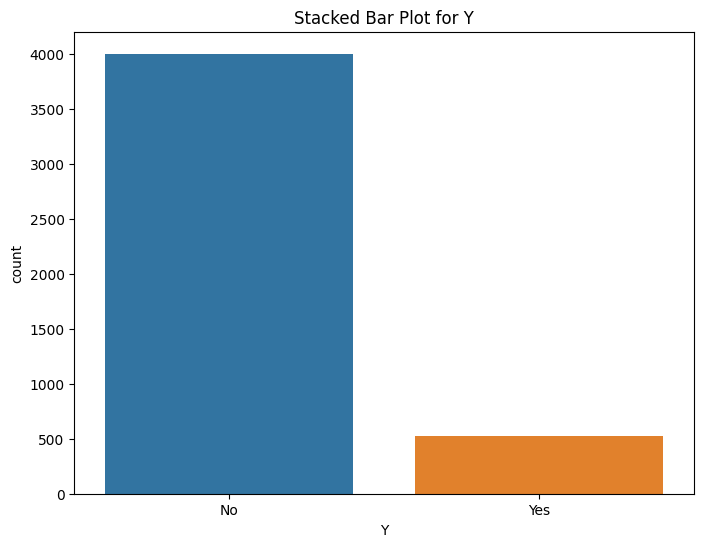

In [34]:
# stacked plot

# Function to create stacked bar plots for each categorical feature
def stacked_bar_plot(df, target):
    for feature in df.select_dtypes(include=['object', 'category']):
        # Plot
        plt.figure(figsize=(8,6))
        sns.countplot(x=feature, hue=target, data=df)
        plt.title(f'Stacked Bar Plot for {feature}')
        plt.show()

# Create stacked bar plots
stacked_bar_plot(dataset, 'Y')


In [27]:
# cross tabulation

for feature in categorical_features:
    cross_tab = pd.crosstab(dataset[feature], dataset['Y'], normalize='index')  # Percentages by row
    print(f"Cross-tabulation of {feature} with Target:")
    print(cross_tab)
    print("\n")

Cross-tabulation of Job with Target:
Y                    No       Yes
Job                              
Admin.         0.878661  0.121339
Blue-collar    0.927061  0.072939
Entrepreneur   0.910714  0.089286
Housemaid      0.875000  0.125000
Management     0.864809  0.135191
Retired        0.765217  0.234783
Self-employed  0.890710  0.109290
Services       0.908873  0.091127
Student        0.773810  0.226190
Technician     0.891927  0.108073
Unemployed     0.898438  0.101562
Unknown        0.815789  0.184211


Cross-tabulation of Marital with Target:
Y               No       Yes
Marital                     
Divorced  0.854167  0.145833
Married   0.900965  0.099035
Single    0.860368  0.139632


Cross-tabulation of Education with Target:
Y                No       Yes
Education                    
Primary    0.905605  0.094395
Secondary  0.893755  0.106245
Tertiary   0.857037  0.142963
Unknown    0.898396  0.101604


Cross-tabulation of Default with Target:
Y              No       Yes
Def

## Feature-target Relationship

In [33]:
# chi-sq test for independence
from scipy.stats import chi2_contingency

# Function to perform chi-square test for each categorical feature
def chi_square_test(df, target):
    results = {}
    for feature in df.select_dtypes(include=['object', 'category']):
        # Cross-tabulation
        crosstab = pd.crosstab(df[feature], df[target])
        chi2, p, dof, expected = chi2_contingency(crosstab)
        results[feature] = {'chi2': chi2, 'p_value': p}
        print(f'Chi-square test for {feature}:\nChi2: {chi2}, P-value: {p}\n')
    return results

# Run chi-square test
chi_square_results = chi_square_test(dataset, 'Y')

Chi-square test for Job:
Chi2: 68.98828575267176, P-value: 1.901391096662705e-10

Chi-square test for Marital:
Chi2: 19.03005634409817, P-value: 7.373535401823763e-05

Chi-square test for Education:
Chi2: 15.236579554873757, P-value: 0.001625240003630989

Chi-square test for Default:
Chi2: 0.0, P-value: 1.0

Chi-square test for Housing:
Chi2: 48.88462833144263, P-value: 2.7146998959323014e-12

Chi-square test for Loan:
Chi2: 21.87182161746215, P-value: 2.9148288298428256e-06

Chi-square test for Contact:
Chi2: 87.86985650165812, P-value: 8.30430129641147e-20

Chi-square test for Month:
Chi2: 250.50006340911358, P-value: 2.195354833570811e-47

Chi-square test for Poutcome:
Chi2: 386.8773872252409, P-value: 1.5398831095860172e-83

Chi-square test for Y:
Chi2: 4511.197526035628, P-value: 0.0



###Regression Analysis

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# One-hot encoding for categorical features (drop_first=True avoids multicollinearity)
X = pd.get_dummies(dataset[categorical_columns], drop_first=True)
y = dataset['y_binary']


In [40]:
X

,Job_Blue-collar,Job_Entrepreneur,Job_Housemaid,Job_Management,Job_Retired,Job_Self-employed,Job_Services,Job_Student,Job_Technician,Job_Unemployed,...,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Poutcome_Other,Poutcome_Success,Poutcome_Unknown
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4517,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4518,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4519,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Get coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print(coefficients)

                Feature  Coefficient
33     Poutcome_Success     2.259349
30            Month_Oct     1.168857
27            Month_Mar     0.786614
4           Job_Retired     0.673222
32       Poutcome_Other     0.545978
16          Default_Yes     0.543401
7           Job_Student     0.398846
14   Education_Tertiary     0.343037
26            Month_Jun     0.252800
13  Education_Secondary     0.218494
2         Job_Housemaid     0.217041
22            Month_Dec     0.171433
5     Job_Self-employed     0.158032
10          Job_Unknown     0.127741
31            Month_Sep     0.075823
3        Job_Management     0.027165
34     Poutcome_Unknown    -0.047708
6          Job_Services    -0.124258
12       Marital_Single    -0.169398
0       Job_Blue-collar    -0.174472
8        Job_Technician    -0.180059
19    Contact_Telephone    -0.183146
17          Housing_Yes    -0.231949
23            Month_Feb    -0.261190
18             Loan_Yes    -0.356605
15    Education_Unknown    -0.386362
1

### Feature Imp

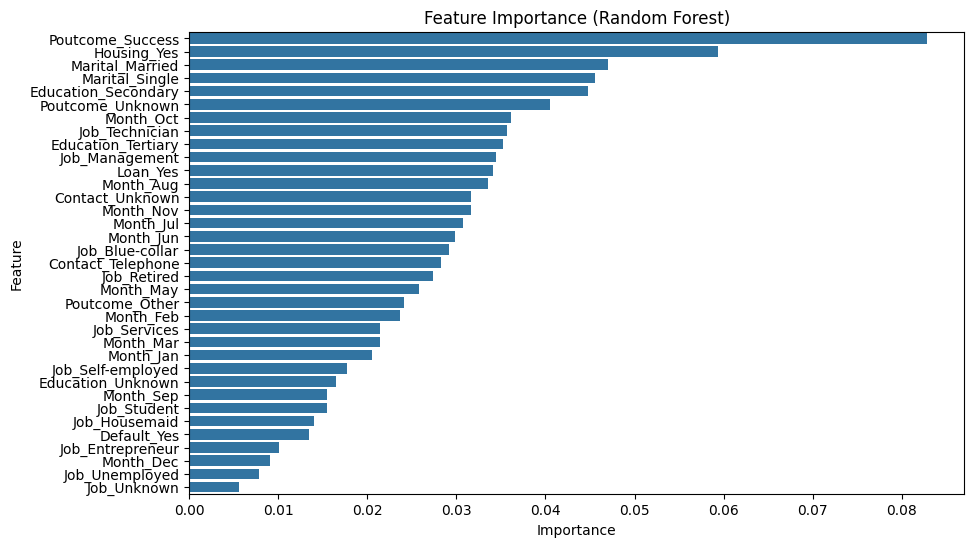

In [42]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Fit RandomForest Classifier model using only the categorical features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

In [44]:
feature_importance

,Feature,Importance
33,Poutcome_Success,0.082853
17,Housing_Yes,0.059365
11,Marital_Married,0.046986
12,Marital_Single,0.045612
13,Education_Secondary,0.044777
34,Poutcome_Unknown,0.040559
30,Month_Oct,0.036083
8,Job_Technician,0.035710
14,Education_Tertiary,0.035186
3,Job_Management,0.034461


###IV & WoE

In [36]:
import numpy as np

def calculate_woe_iv(df, feature, target):
    # Create a dataframe with counts of each feature value for each target class
    temp = pd.crosstab(df[feature], df[target], margins=False, normalize='columns')
    temp['Total'] = df[feature].value_counts(normalize=True)

    # Calculate WOE and IV
    temp['WOE'] = np.log(temp[1] / temp[0])
    temp['IV'] = (temp[1] - temp[0]) * temp['WOE']

    iv = temp['IV'].sum()
    print(f'IV for {feature}: {iv}')
    return temp[['WOE', 'IV']], iv

# Run WOE and IV calculation for each categorical feature
woe_iv_results = {}
for feature in dataset.select_dtypes(include=['object', 'category']):
    woe_iv_results[feature], iv = calculate_woe_iv(dataset, feature, 'y_binary')


IV for Job: 0.13251854742728092
IV for Marital: 0.04009032555607127
IV for Education: 0.03181211694236827
IV for Default: 1.6450124824351054e-05
IV for Housing: 0.10655553101753026
IV for Loan: 0.06079091829519839
IV for Contact: 0.2477624664660033
IV for Month: 0.37953277364723703
IV for Poutcome: 0.4618899274360784
IV for Y: inf


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Non-linear Check

In [43]:
from sklearn.feature_selection import mutual_info_classif


# One-hot encode the categorical features
X = pd.get_dummies(dataset[categorical_columns], drop_first=True)
y = dataset['y_binary']

# Calculate MI scores for categorical features
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Convert the MI scores into a DataFrame for better visualization
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Display the MI scores
print(mi_scores_df)


                Feature      MI Score
33     Poutcome_Success  2.352127e-02
20      Contact_Unknown  1.132100e-02
34     Poutcome_Unknown  1.124728e-02
30            Month_Oct  6.824075e-03
28            Month_May  5.699116e-03
17          Housing_Yes  5.425481e-03
27            Month_Mar  3.451018e-03
4           Job_Retired  3.043457e-03
18             Loan_Yes  2.850844e-03
0       Job_Blue-collar  2.551646e-03
11      Marital_Married  2.047643e-03
31            Month_Sep  1.833408e-03
22            Month_Dec  1.565963e-03
14   Education_Tertiary  1.549524e-03
32       Poutcome_Other  1.158273e-03
12       Marital_Single  1.013049e-03
7           Job_Student  9.289912e-04
25            Month_Jul  8.063110e-04
23            Month_Feb  7.069335e-04
3        Job_Management  5.147822e-04
13  Education_Secondary  4.131164e-04
19    Contact_Telephone  3.134995e-04
6          Job_Services  3.074539e-04
10          Job_Unknown  1.714220e-04
1      Job_Entrepreneur  1.365608e-04
29          